## Business Understanding

There are some questions i would like to work on in this project:
* What are the employment status of non technical graduates?
* What are the most popular programming languages?
* What determines a good quality of life and features invlved in predicting it?

## Data Understanding

To answer the above questions i need to collect data and provide insights to answer those questions. The further steps will dig through the data according to the questions asked.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder 
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

In [2]:
# read the csv file
df= pd.read_csv('survey_results_public.csv')
df1 = pd.read_csv('survey_results_schema.csv')

In [14]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [17]:
# number of rows and columns
df.shape

(88883, 85)

In [18]:
# hidden columns
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [23]:
sum(df.WorkChallenge.isnull())

20742

## Data Preparation

The following are the steps to prepare the data to answer the questions

In [46]:
# Columns that have no missing values
df.columns[(np.sum(df.isnull())==0)]

Index(['Respondent', 'Hobbyist', 'OpenSourcer'], dtype='object')

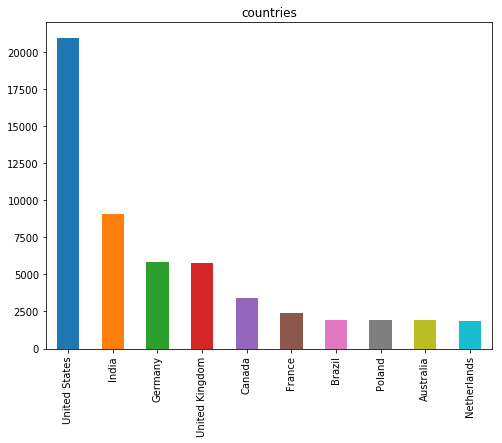

In [6]:
# plot the countries with highest developers and write a function for visualizations
def plot(parameter,title):
    plt.figure(figsize=[8,6])
    parameter.plot(kind='bar')
    plt.title(title)
    return parameter
country=df.Country.value_counts()[:10]
plot(country,'countries');

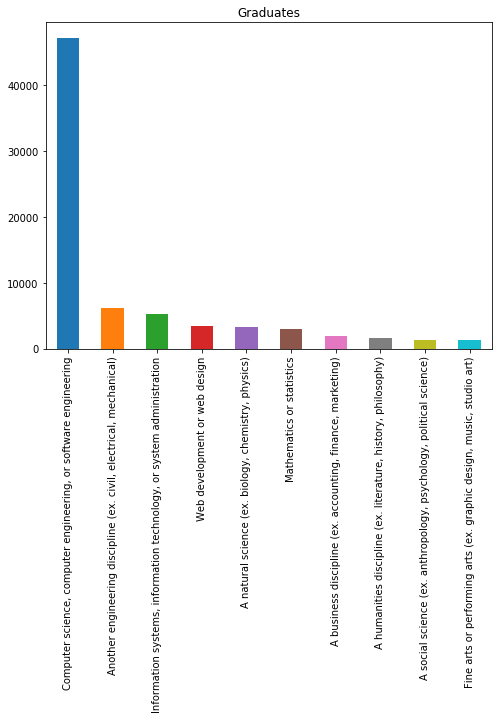

In [7]:
# plot the education background of the developers
country=df.UndergradMajor.value_counts()[:10]
plot(country,'Graduates');

In [90]:
df.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering          47214
Another engineering discipline (ex. civil, electrical, mechanical)        6222
Information systems, information technology, or system administration     5253
Web development or web design                                             3422
A natural science (ex. biology, chemistry, physics)                       3232
Mathematics or statistics                                                 2975
A business discipline (ex. accounting, finance, marketing)                1841
A humanities discipline (ex. literature, history, philosophy)             1571
A social science (ex. anthropology, psychology, political science)        1352
Fine arts or performing arts (ex. graphic design, music, studio art)      1233
I never declared a major                                                   976
A health science (ex. nursing, pharmacy, radiology)                        323
Name: UndergradMajor, dtype: int64

## Question-1: What are the employment status of non-technical graduates 

Non technical grads are the category apart from computer science or software engineering 

In [8]:
# filter the non-technical grads
Degree=df.query('UndergradMajor!="Computer science, computer engineering, or software engineering"')

In [9]:
values=Degree.Employment.value_counts()

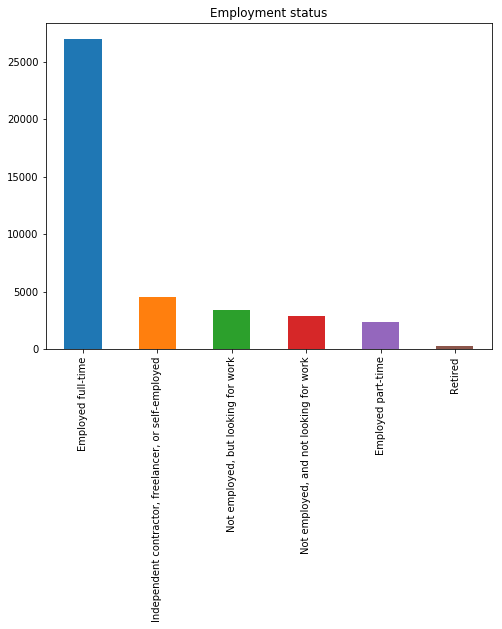

In [11]:
plot(values,'Employment status');

#### Conclusion- 
Most of the graduates are employed full time,but the red column indicates that people drop out from the course and are not interested in working in that particular field. If we combine the red and green columns the rate of unemployment is high which shows that non technical grads fnd it difficult to get in to the tech field

## Question-2:What are the most popular programming languages in future

In [12]:
# filter top 10 programming languages
languages = df.LanguageDesireNextYear.value_counts()[:10]

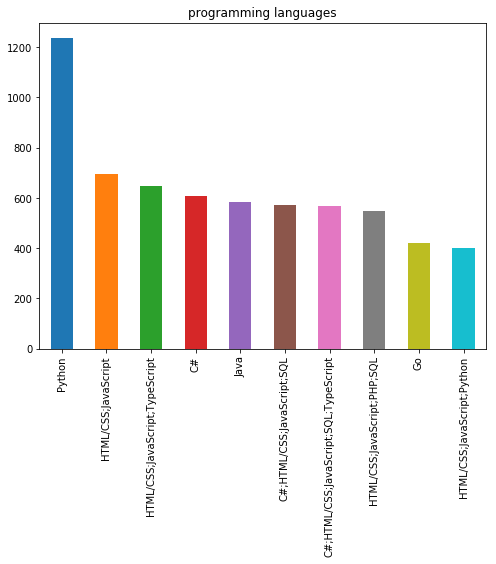

In [13]:
plot(languages,'programming languages');

#### Conclusion- Most of the programmers prefer to learn python in the upcomming years making it the most popular language

## Data modeling

To answer the third question we need to use the decision tree classification model to use the categorial variables to predict the response

## Quesion-3 what determines the good quality of life? how to predict the quality of life and features involved in predicting it?

In [16]:
#fill the null values with mean
df.WorkWeekHrs.fillna(df.WorkWeekHrs.mean(),inplace=True)

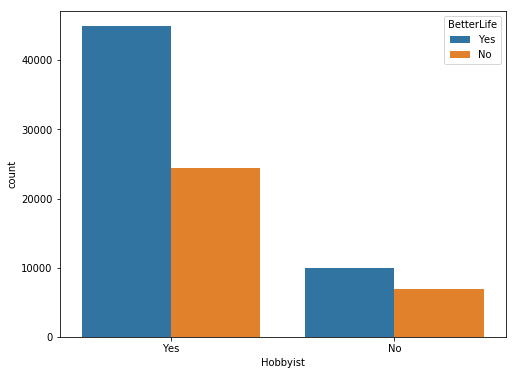

In [18]:
# use the countplot to plot the realtionship between 2 qualitative variables
plt.figure(figsize=[8,6])
sb.countplot(data= df,x= 'Hobbyist',hue='BetterLife')

In [19]:
# create the list of categorial variables you wnat to work with
col=['WorkChallenge','Student','BetterLife','Hobbyist','Employment']

In [20]:
# use the label encoder to convert the string to integer 
le = preprocessing.LabelEncoder()
df['WorkChallenge'] = le.fit_transform(df['WorkChallenge'].astype(str))
df['Student'] = le.fit_transform(df['Student'].astype(str))
df['BetterLife'] = le.fit_transform(df['BetterLife'].astype(str))
df['Hobbyist'] = le.fit_transform(df['Hobbyist'].astype(str))      
df['Employment'] = le.fit_transform(df['Employment'].astype(str)) 

In [21]:
df2=df.copy()

In [22]:
# Drop the null values
df.dropna(axis=0,inplace=True)

In [23]:
np.sum(df.isnull().sum())

0

In [73]:
# use onhotencoder to split the numerical categorial data into many columns
onehotencoder = OneHotEncoder() 
onehotencoder.fit(df[col])
df_new = onehotencoder.transform(df[col]).toarray()     

C:\Users\Nik\Downloads\New folder\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [74]:
df_new.shape

(3537, 141)

In [75]:
ohe_df = pd.DataFrame(df_new, columns=list(onehotencoder.get_feature_names()))
ohe_df.reset_index()
ohe_df
df['BetterLife'].reset_index()
df_1 = pd.concat([ohe_df.reset_index(),df['BetterLife'].reset_index()], axis=1)

In [76]:
# Run the decision tree classification algorithm to use the categorial variables to predict the response
X= df_1.drop('BetterLife',axis=1)
Y= df_1['BetterLife']
X_train, X_test, y_train, y_test = train_test_split( 
            X, Y, test_size = 0.3, random_state = 0) 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)

array([1, 0, 0, ..., 1, 0, 1])

In [18]:
clf.score(X_test, y_test)

1.0

In [19]:
clf.score(X_train, y_train)

1.0

## Evaluate the results

In this project we took a look at the results of the Stack Overflow 2019 survey which will be beneficial for aspiring programmers.

1. We plotted the employment status the non technical graduates and found that majority of them were employed but the number of unemployed graduates were more and have a tough time being employed in this field .

2. We saw the most python being the most demanding programming languages in future an aspirant should pursue.

3. Finally we predicted the quality of life based on various factors like Employment status, Hobby, student,workchallenge